# 데이터 불러오기

In [78]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import os
from google.colab import drive

# 구글 드라이브 마운트
drive.mount("/content/drive", force_remount=True)

# 작업 디렉토리 변경
os.chdir("/content/drive/MyDrive/1st Dataton/DatEZ")

import pandas as pd
import numpy as np

Mounted at /content/drive


In [3]:
import pandas as pd

# 데이터 파일을 읽어서 데이터프레임으로 저장
data = pd.read_csv("/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도.csv")

# 데이터프레임 출력
print(data)

    행정구역별(1)  특성별(1)  특성별(2)   2018 2018.1  2018.2 2018.3       2018.4  \
0   행정구역별(1)  특성별(1)  특성별(2)      계  매우 안전  비교적 안전     보통  비교적 안전하지 않음   
1         전국      전체       계  100.0    1.3    19.2   48.2         27.6   
2         전국      성별      남자  100.0    1.8    22.7   48.5         23.9   
3         전국      성별      여자  100.0    0.8    15.8   48.0         31.1   
4         서울      전체       계  100.0    1.5    23.0   47.2         25.1   
5         서울      성별      남자  100.0    2.0    28.1   46.1         20.5   
6         서울      성별      여자  100.0    1.0    18.2   48.2         29.3   
7         부산      전체       계  100.0    2.4    20.2   54.9         20.2   
8         부산      성별      남자  100.0    3.1    22.2   55.2         17.7   
9         부산      성별      여자  100.0    1.7    18.3   54.7         22.5   
10        대구      전체       계  100.0    0.5    11.7   49.7         29.8   
11        대구      성별      남자  100.0    0.8    13.1   51.8         27.6   
12        대구      성별      여자  100.0   

# 한글 폰트 해결

In [57]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Nanum 글꼴 설치
!apt-get -y install fonts-nanum

# matplotlib에서 한글 폰트 사용 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔 글꼴 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

import matplotlib.font_manager as fm
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 글꼴 경로 추가
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)

# 한글을 사용할 수 있도록 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

# 인천 선택

In [77]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()

filename = list(uploaded.keys())[0]

try:
    df = pd.read_csv('인구_천명당_범죄발생건수_시도-문범준.csv', encoding='cp949')
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure the file '인구_천명당_범죄발생건수_시도-문범준.csv' exists in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Convert '2023' column 숫자로 변환
df['2023'] = pd.to_numeric(df['2023'], errors='coerce')

# 인구천명당범죄발생건수가 29 이상인 지역만 남김
filtered_df = df[df['2023'] >= 29]

# 전년대비 증감률이 양수인 지역만 남김
filtered_df['2023.1'] = pd.to_numeric(filtered_df['2023.1'], errors='coerce')

filtered_df = filtered_df[filtered_df['2023.1'] > 0]

# 수도권만 연구 '광주광역시' 제거
filtered_df = filtered_df[filtered_df['행정구역별'] != '광주광역시']

filtered_df['2023.2'] = pd.to_numeric(filtered_df['2023.2'], errors='coerce')

# 남은 지역 중 범죄 증감률이 높은 지역 선택
filtered_df = filtered_df.sort_values(by=['2023.2'], ascending=False).head(1)


display(filtered_df)

Saving 인구_천명당_범죄발생건수_시도-문범준.csv to 인구_천명당_범죄발생건수_시도-문범준.csv


,행정구역별,2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,행정구역별,인구 천명당 범죄발생건수,"인구 천명당 범죄발생건수(A÷B×1,000) (건)","인구 천명당 범죄발생건수(A÷B×1,000) (건)",범죄발생건수,범죄발생건수(A) (건),범죄발생건수(A) (건)
1,행정구역별,원데이터,전년 대비 증감,증감률,원데이터,전년 대비 증감,증감률
2,전국,28.6,0.7,2.5,"1,467,729","32,841",2.3
3,서울특별시,29.5,-0.1,-0.3,"277,213","-2,294",-0.8
4,부산광역시,32.3,0.6,1.9,"106,433","1,376",1.3


<ipython-input-77-13c3dd06b466>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['2023.1'] = pd.to_numeric(filtered_df['2023.1'], errors='coerce')


,행정구역별,2023,2023.1,2023.2,2023.3,2023.4,2023.5
6,인천광역시,29.3,1.5,5.4,"87,831","5,434",6.6


# 인천 CCTV 전처리

In [70]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()

filename = list(uploaded.keys())[0]

# 파일 읽기 (인코딩은 상황에 따라 'cp949', 'utf-8', 'euc-kr' 등 시도)
try:
    df = pd.read_csv(filename, encoding='cp949')
except UnicodeDecodeError:
    df = pd.read_csv(filename, encoding='utf-8')
except:
    df = pd.read_csv(filename, encoding='euc-kr')

# 데이터 미리보기
print(f"✅ 데이터 '{filename}' 로드 완료!")

filtered_df = df[df['설치목적구분'].isin(['생활방범', '어린이보호'])]

# 원하는 컬럼만 선택 (예시: 관리기관명, 소재지도로명주소, 설치목적구분, 카메라대수, WGS84위도, WGS84경도)
selected_columns = ['관리기관명', '소재지도로명주소', '설치목적구분', '카메라대수', 'WGS84위도', 'WGS84경도']
result_df = filtered_df[selected_columns]

# 기존 '번호' 컬럼이 있으면 삭제
if '번호' in result_df.columns:
    result_df = result_df.drop(columns=['번호'])

# 번호를 1부터 시작해서 오름차순으로 부여
result_df.insert(0, '번호', range(1, len(result_df) + 1))

# 결과 일부 출력
result_df

Saving 인천 CCTV정보.csv to 인천 CCTV정보 (1).csv
✅ 데이터 '인천 CCTV정보 (1).csv' 로드 완료!


,번호,관리기관명,소재지도로명주소,설치목적구분,카메라대수,WGS84위도,WGS84경도
0,1,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥로 440-8,생활방범,1,37.253792,126.466879
1,2,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 선재로 358,생활방범,1,37.254073,126.512068
2,3,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로35번길 34,생활방범,1,37.257637,126.499781
3,4,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로 389,생활방범,3,37.281184,126.485711
4,5,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥서로496번길 55,생활방범,1,37.279928,126.454657
...,...,...,...,...,...,...,...
11876,10366,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737960,126.515781
11877,10367,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.737950,126.515244
11878,10368,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737801,126.515021
11879,10369,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.747541,126.474915


In [71]:
# 지도로 CCTV분포 히트맵

import folium
from folium.plugins import HeatMap

# 지도 중심(인천시청 기준)
center_lat, center_lon = 37.456255, 126.705206
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# 히트맵 데이터: [위도, 경도, 카메라대수]
heat_data = [
    [row['WGS84위도'], row['WGS84경도'], row['카메라대수']]
    for idx, row in result_df.iterrows()
    if not pd.isnull(row['WGS84위도']) and not pd.isnull(row['WGS84경도'])
]

HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)
m

In [72]:
import re

# 함수: 주소에서 군/구 추출
def extract_district(address):
    if pd.isnull(address):
        return None
    # 시/도명 제거
    address_no_city = re.sub(
        r'^(서울특별시|부산광역시|대전광역시|인천광역시|광주광역시|대구광역시|울산광역시|세종특별자치시|경기도|강원도|충청북도|충청남도|전라북도|전라남도|경상북도|경상남도|제주특별자치도)',
        '', address
    )
    # 군/구 추출 (띄어쓰기 없어도 가능)
    match = re.search(r'([가-힣]+(군|구))', address_no_city)
    if match:
        return match.group(1)
    else:
        return None

# '군구' 컬럼이 없으면 새로 생성
if '군구' not in result_df.columns:
    result_df['군구'] = None  # 또는 result_df['군구'] = np.nan

# 군구 결측치 채우기
result_df['군구'] = result_df['군구'].fillna(
    result_df['소재지도로명주소'].apply(extract_district)
)

# 여전히 결측(공란)인 행 제거
result_df = result_df.dropna(subset=['군구'])

# 결과 확인
print(result_df[['소재지도로명주소', '군구']].head())

                     소재지도로명주소   군구
0     인천광역시 옹진군 영흥면 영흥로 440-8  옹진군
1       인천광역시 옹진군 영흥면 선재로 358  옹진군
2   인천광역시 옹진군 영흥면 영흥북로35번길 34  옹진군
3      인천광역시 옹진군 영흥면 영흥북로 389  옹진군
4  인천광역시 옹진군 영흥면 영흥서로496번길 55  옹진군


<ipython-input-72-83fc0672d5b8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['군구'] = None  # 또는 result_df['군구'] = np.nan
<ipython-input-72-83fc0672d5b8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['군구'] = result_df['군구'].fillna(


In [73]:
result_df

,번호,관리기관명,소재지도로명주소,설치목적구분,카메라대수,WGS84위도,WGS84경도,군구
0,1,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥로 440-8,생활방범,1,37.253792,126.466879,옹진군
1,2,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 선재로 358,생활방범,1,37.254073,126.512068,옹진군
2,3,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로35번길 34,생활방범,1,37.257637,126.499781,옹진군
3,4,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로 389,생활방범,3,37.281184,126.485711,옹진군
4,5,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥서로496번길 55,생활방범,1,37.279928,126.454657,옹진군
...,...,...,...,...,...,...,...,...
11876,10366,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737960,126.515781,강화군
11877,10367,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.737950,126.515244,강화군
11878,10368,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737801,126.515021,강화군
11879,10369,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.747541,126.474915,강화군


In [74]:
# '미추홀구구' 행 제거
filtered_df = result_df[~result_df['군구'].isin(['미추홀구구'])].copy()

# '번호' 오름차순 정렬 및 인덱스 재설정
filtered_df = filtered_df.sort_values(by='번호').reset_index(drop=True)

# 결과 확인
filtered_df

,번호,관리기관명,소재지도로명주소,설치목적구분,카메라대수,WGS84위도,WGS84경도,군구
0,1,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥로 440-8,생활방범,1,37.253792,126.466879,옹진군
1,2,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 선재로 358,생활방범,1,37.254073,126.512068,옹진군
2,3,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로35번길 34,생활방범,1,37.257637,126.499781,옹진군
3,4,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로 389,생활방범,3,37.281184,126.485711,옹진군
4,5,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥서로496번길 55,생활방범,1,37.279928,126.454657,옹진군
...,...,...,...,...,...,...,...,...
9054,10366,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737960,126.515781,강화군
9055,10367,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.737950,126.515244,강화군
9056,10368,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737801,126.515021,강화군
9057,10369,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.747541,126.474915,강화군


In [75]:
if '번호' in filtered_df.columns:
    filtered_df = filtered_df.drop(columns=['번호'])

# 결과 확인
filtered_df

,관리기관명,소재지도로명주소,설치목적구분,카메라대수,WGS84위도,WGS84경도,군구
0,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥로 440-8,생활방범,1,37.253792,126.466879,옹진군
1,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 선재로 358,생활방범,1,37.254073,126.512068,옹진군
2,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로35번길 34,생활방범,1,37.257637,126.499781,옹진군
3,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥북로 389,생활방범,3,37.281184,126.485711,옹진군
4,인천광역시 옹진군 재난안전담당관,인천광역시 옹진군 영흥면 영흥서로496번길 55,생활방범,1,37.279928,126.454657,옹진군
...,...,...,...,...,...,...,...
9054,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737960,126.515781,강화군
9055,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.737950,126.515244,강화군
9056,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,2,37.737801,126.515021,강화군
9057,인천광역시 강화군,인천광역시 강화군 강화읍,생활방범,3,37.747541,126.474915,강화군


In [76]:
# 군구별 항목 개수 계산
count_by_district1 = filtered_df['군구'].value_counts().sort_index()

# 결과 출력
print(count_by_district1)

군구
강화군      789
계양구     1039
남동구     1189
동구       332
미추홀구    2449
부평구     1248
서구       758
연수구      471
옹진군      121
중구       663
Name: count, dtype: int64


Index(['FULL_NM', 'SGG_CD', 'SGG_NM', 'SHAPE_AREA', 'SHAPE_LEN', 'SGG_CD_L',
       'Fisheries', 'Employment', 'Road Act', 'Ship Crew', 'Resident R',
       'Public Off', 'Trucking T', 'Negligent', 'Specialize', 'Mountainou',
       'Air Qualit', 'Immigratio', 'Other Obsc', 'Negligen_1', 'Special Ac',
       'Fisherie_1', 'Road Traff', 'Punishment', 'Medical Se', 'Perjury an',
       'Trademark', 'Occupation', 'Act on the', 'Building A', 'Child Welf',
       'Act on t_1', 'Extortion', 'Act on t_2', 'Narcotics', 'Breach of',
       'False Accu', 'Gambling a', 'Occupati_1', 'Minor Offe', 'Food Sanit',
       'Military S', 'Act on t_3', 'Reserve Fo', 'Electronic', 'Juvenile P',
       'Copyright', 'Obstructio', 'Obstruct_1', 'Housebreak', 'Road Tra_1',
       'Workers' R', 'Document', 'Act on Pro', 'Road Tra_2', 'Threats',
       'Motor Vehi', 'Credit Bus', 'Road Tra_3', 'Motor Ve_1', 'Honor',
       'Sexual Vio', 'Bodily Inj', 'Labor Stan', 'Other Spec', 'Damage (or',
       'Embezzleme'

<Axes: >

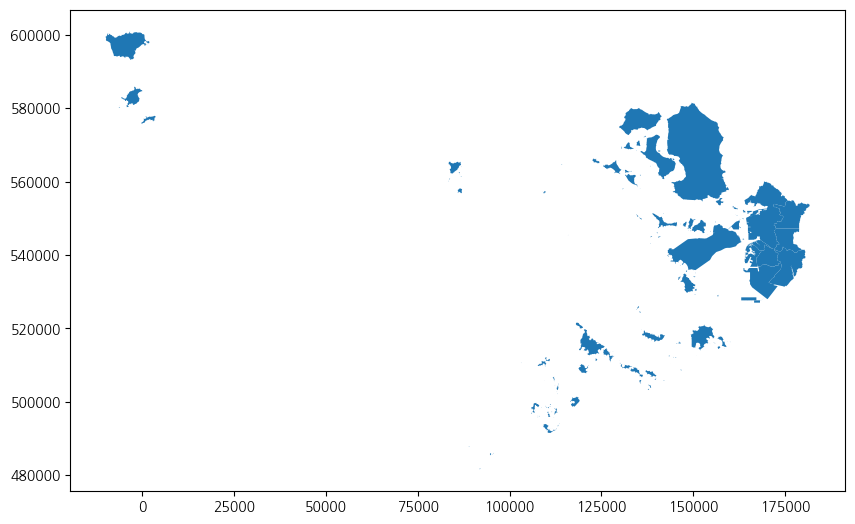

In [80]:
import geopandas as gpd

# .shp 파일 경로 지정
shp_path = '/content/drive/MyDrive/1st Dataton/DatEZ/Criminal+area/Criminal area.shp'  # Colab/로컬 경로에 맞게 수정

# GeoDataFrame으로 불러오기
gdf = gpd.read_file(shp_path)

# 인천의 군/구 이름 리스트 (예시, 실제 데이터의 컬럼명과 값에 맞게 수정)
incheon_districts = [
    '인천광역시 중구', '인천광역시 동구', '인천광역시 미추홀구', '인천광역시 연수구', '인천광역시 남동구', '인천광역시 부평구', '인천광역시 계양구', '인천광역시 서구', '인천광역시 강화군', '인천광역시 옹진군'
]

# 군/구명이 들어있는 컬럼명 확인 (예: 'SIG_KOR_NM', '군구', 'adm_nm' 등)
print(gdf.columns)

# 예시: 컬럼명이 'SIG_KOR_NM'인 경우
incheon_gdf = gdf[gdf['FULL_NM'].isin(incheon_districts)]

# 결과 확인
print(incheon_gdf[['FULL_NM']].head())

# 지도 시각화
incheon_gdf.plot(figsize=(10, 10))

Index(['FULL_NM', 'SGG_CD', 'SGG_NM', 'SHAPE_AREA', 'SHAPE_LEN', 'SGG_CD_L',
       'Fisheries', 'Employment', 'Road Act', 'Ship Crew', 'Resident R',
       'Public Off', 'Trucking T', 'Negligent', 'Specialize', 'Mountainou',
       'Air Qualit', 'Immigratio', 'Other Obsc', 'Negligen_1', 'Special Ac',
       'Fisherie_1', 'Road Traff', 'Punishment', 'Medical Se', 'Perjury an',
       'Trademark', 'Occupation', 'Act on the', 'Building A', 'Child Welf',
       'Act on t_1', 'Extortion', 'Act on t_2', 'Narcotics', 'Breach of',
       'False Accu', 'Gambling a', 'Occupati_1', 'Minor Offe', 'Food Sanit',
       'Military S', 'Act on t_3', 'Reserve Fo', 'Electronic', 'Juvenile P',
       'Copyright', 'Obstructio', 'Obstruct_1', 'Housebreak', 'Road Tra_1',
       'Workers' R', 'Document', 'Act on Pro', 'Road Tra_2', 'Threats',
       'Motor Vehi', 'Credit Bus', 'Road Tra_3', 'Motor Ve_1', 'Honor',
       'Sexual Vio', 'Bodily Inj', 'Labor Stan', 'Other Spec', 'Damage (or',
       'Embezzleme'

<Axes: >

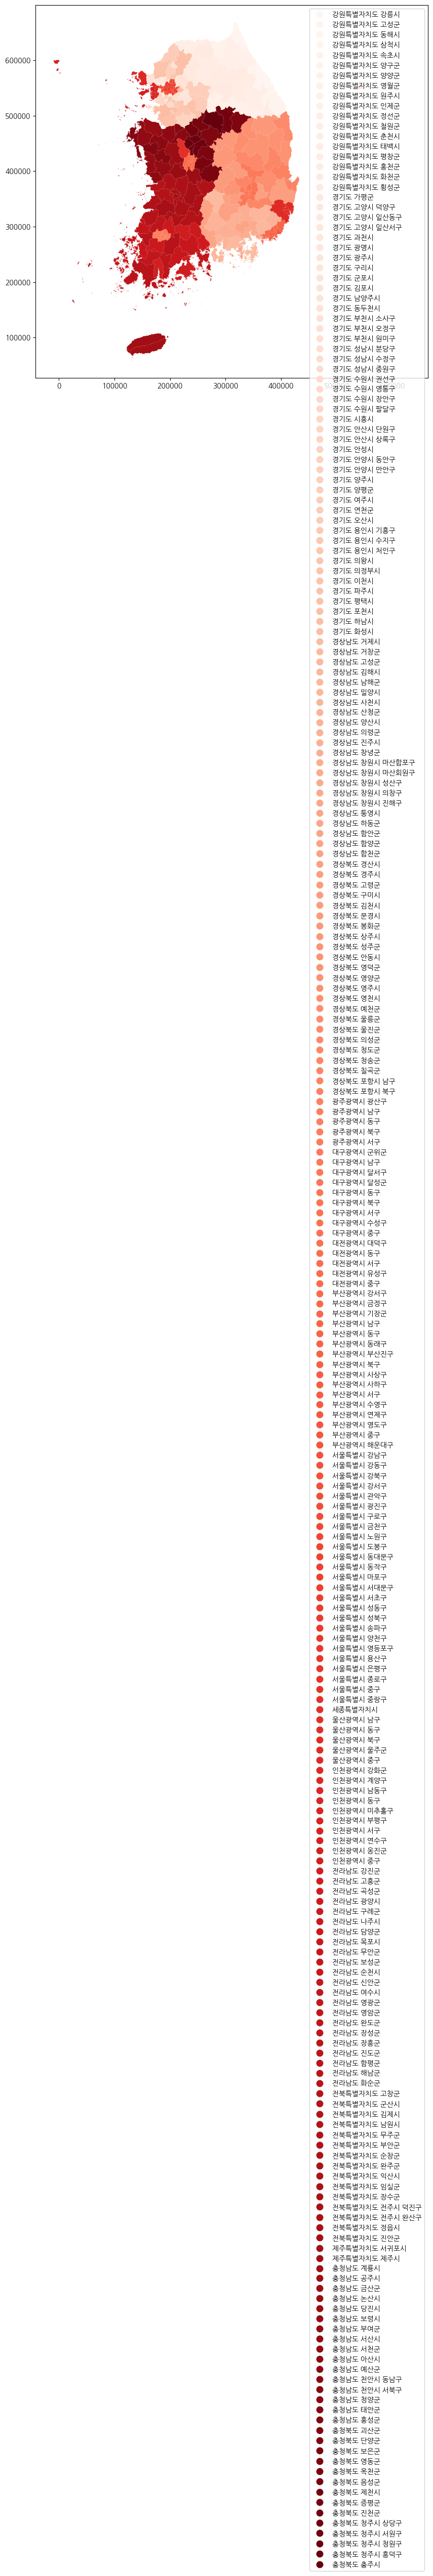

In [81]:
import geopandas as gpd

# .shp 파일 경로 지정
shp_path = '/content/drive/MyDrive/1st Dataton/DatEZ/Criminal+area/Criminal area.shp'  # Colab/로컬 경로에 맞게 수정

# GeoDataFrame으로 불러오기
gdf = gpd.read_file(shp_path)

# 데이터 확인
print(gdf.columns)
print(gdf.head())

# 예: 시군구별 전체 범죄 건수 Choropleth 시각화
gdf.plot(column='FULL_NM', cmap='Reds', legend=True, figsize=(10,10))

# 사회안전에 대한 인식_2024

In [15]:
import pandas as pd

# 1. 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2024.csv'

# 2. 데이터 읽기
df = pd.read_csv(file_path)

# 3. '특성별(1)'이 '전체'인 행 제거
df = df[df['특성별(1)'] != '전체']

# 4. 인식 수준을 숫자로 매핑
safety_mapping = {
    '매우 안전': 0,
    '비교적 안전': 1,
    '보통': 2,
    '비교적 안전하지 않음': 3,
    '매우 안전하지 않음': 4
}
df['특성별(1)'] = df['특성별(1)'].map(safety_mapping)

df.to_csv(file_path, index=False)

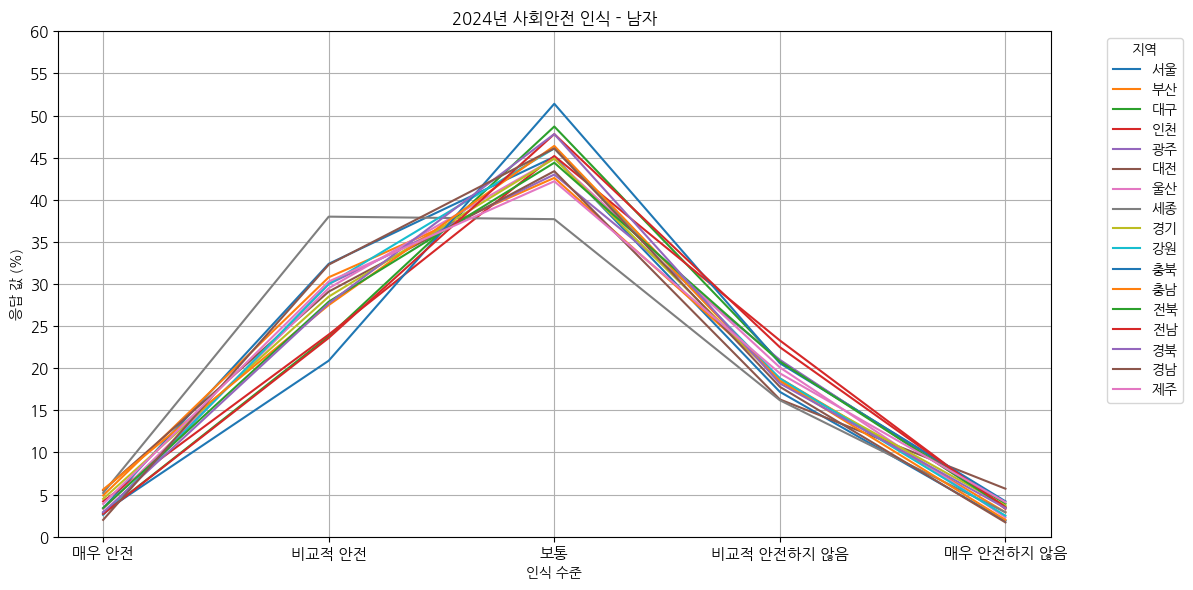

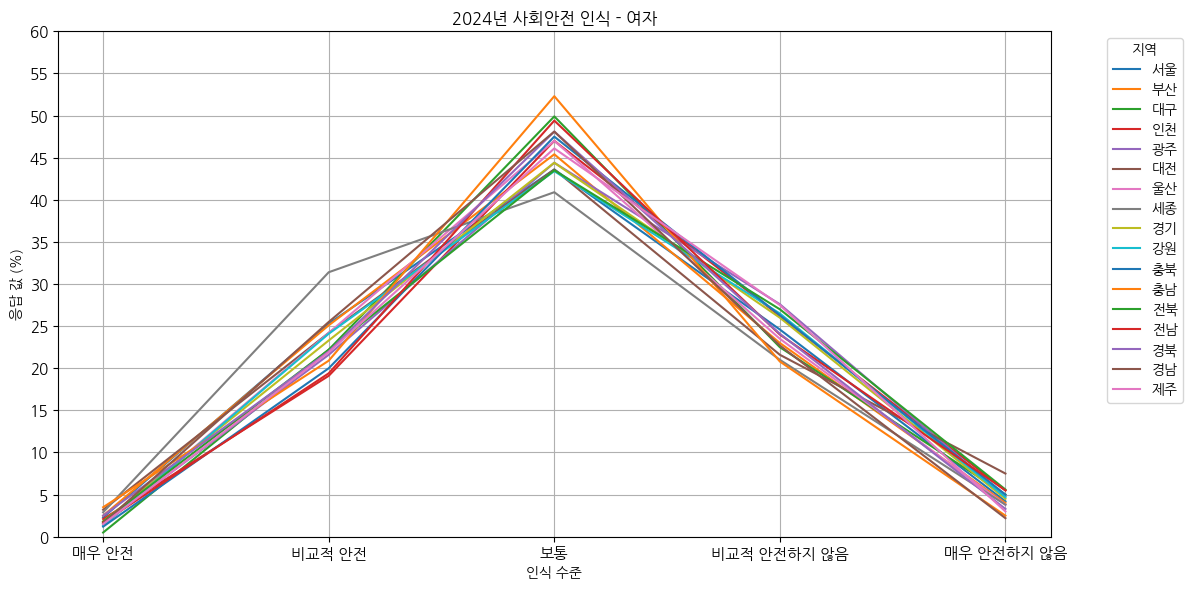

In [20]:
# 1. 한글 폰트 설정 (Colab)
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 라이브러리
import pandas as pd

# 3. 데이터 불러오기
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2024.csv'
df = pd.read_csv(file_path)

# 4. '전국' 제외
df = df[df['행정구역별(1)'] != '전국']

# 5. 인식 수준 열 숫자형 변환
safety_cols = ['2024.1', '2024.2', '2024.3', '2024.4', '2024.5']
for col in safety_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. 필요한 열만 추출
df = df[['행정구역별(1)', '특성별(2)'] + safety_cols]

# 7. 인식 수준 레이블
safety_labels = ['매우 안전', '비교적 안전', '보통', '비교적 안전하지 않음', '매우 안전하지 않음']

# 8. 남자 그래프
plt.figure(figsize=(12, 6))
for region in df['행정구역별(1)'].unique():
    male_row = df[(df['행정구역별(1)'] == region) & (df['특성별(2)'] == '남자')]
    if not male_row.empty:
        plt.plot(safety_labels, male_row[safety_cols].values.flatten().astype(float), label=region)

plt.title('2024년 사회안전 인식 - 남자')
plt.xlabel('인식 수준')
plt.ylabel('응답 값 (%)')
plt.yticks(range(0, 61, 5), fontsize=11)
plt.ylim(0, 60)
plt.xticks(fontsize=11)
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. 여자 그래프
plt.figure(figsize=(12, 6))
for region in df['행정구역별(1)'].unique():
    female_row = df[(df['행정구역별(1)'] == region) & (df['특성별(2)'] == '여자')]
    if not female_row.empty:
        plt.plot(safety_labels, female_row[safety_cols].values.flatten().astype(float), label=region)

plt.title('2024년 사회안전 인식 - 여자')
plt.xlabel('인식 수준')
plt.ylabel('응답 값 (%)')
plt.yticks(range(0, 61, 5), fontsize=11)
plt.ylim(0, 60)
plt.xticks(fontsize=11)
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


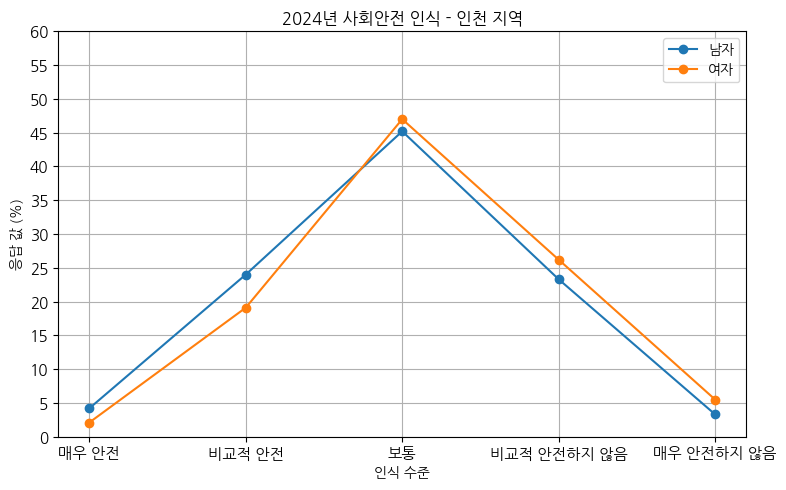

In [21]:
# 1. 한글 폰트 설정 (Colab 한글 깨짐 방지)
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 라이브러리
import pandas as pd

# 3. 데이터 불러오기
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2024.csv'
df = pd.read_csv(file_path)

# 4. '전국' 제외
df = df[df['행정구역별(1)'] != '전국']

# 5. 인식 수준 열 숫자형 변환
safety_cols = ['2024.1', '2024.2', '2024.3', '2024.4', '2024.5']
for col in safety_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. 필요한 열만 추출
df = df[['행정구역별(1)', '특성별(2)'] + safety_cols]

# 7. 인식 수준 레이블
safety_labels = ['매우 안전', '비교적 안전', '보통', '비교적 안전하지 않음', '매우 안전하지 않음']

# 8. 인천 지역 필터링
incheon_df = df[df['행정구역별(1)'] == '인천']

# 9. 남자 데이터
male_row = incheon_df[incheon_df['특성별(2)'] == '남자']
male_values = male_row[safety_cols].values.flatten().astype(float) if not male_row.empty else [None] * 5

# 10. 여자 데이터
female_row = incheon_df[incheon_df['특성별(2)'] == '여자']
female_values = female_row[safety_cols].values.flatten().astype(float) if not female_row.empty else [None] * 5

# 11. 꺾은선 그래프 (남녀 모두 표시)
plt.figure(figsize=(8, 5))
plt.plot(safety_labels, male_values, marker='o', label='남자')
plt.plot(safety_labels, female_values, marker='o', label='여자')

plt.title('2024년 사회안전 인식 - 인천 지역')
plt.xlabel('인식 수준')
plt.ylabel('응답 값 (%)')
plt.yticks(range(0, 61, 5), fontsize=11)
plt.ylim(0, 60)
plt.xticks(fontsize=11)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 사회안전에 대한 인식_2018

In [23]:
import pandas as pd

# 1. 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2018.csv'

# 2. 데이터 읽기
df = pd.read_csv(file_path)

# 3. '특성별(1)'이 '전체'인 행 제거
df = df[df['특성별(1)'] != '전체']

# 4. 인식 수준을 숫자로 매핑
safety_mapping = {
    '매우 안전': 0,
    '비교적 안전': 1,
    '보통': 2,
    '비교적 안전하지 않음': 3,
    '매우 안전하지 않음': 4
}
df['특성별(1)'] = df['특성별(1)'].map(safety_mapping)

df.to_csv(file_path, index=False)

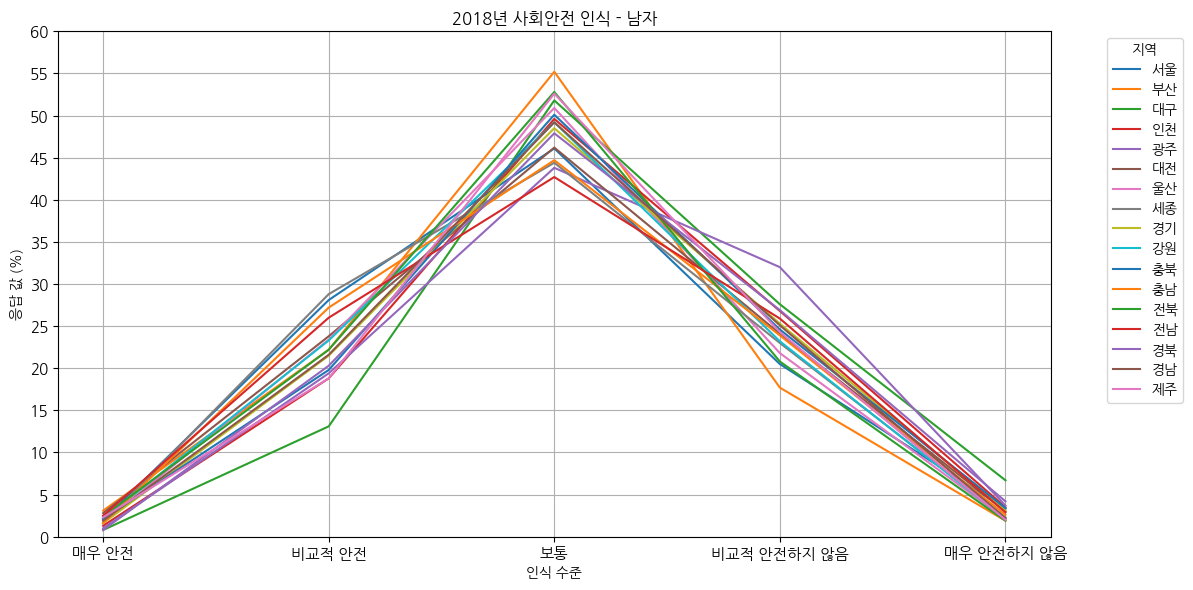

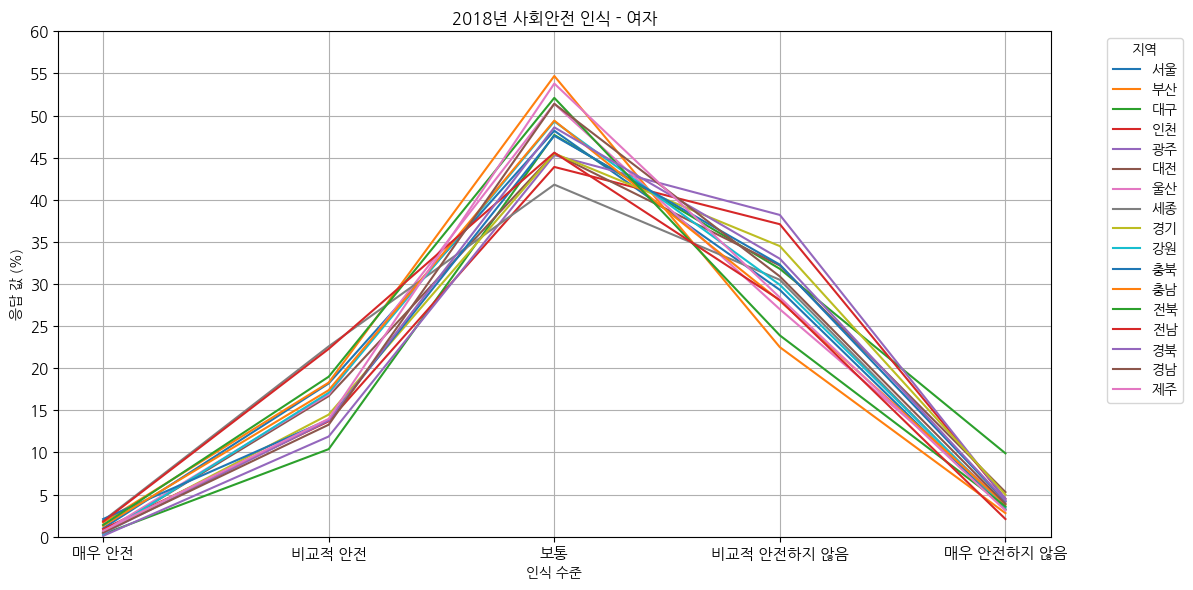

In [25]:
# 1. 한글 폰트 설정 (Colab)
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 라이브러리
import pandas as pd

# 3. 데이터 불러오기
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2018.csv'
df = pd.read_csv(file_path)

# 4. '전국' 제외
df = df[df['행정구역별(1)'] != '전국']

# 5. 인식 수준 열 숫자형 변환
safety_cols = ['2018.1', '2018.2', '2018.3', '2018.4', '2018.5']
for col in safety_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. 필요한 열만 추출
df = df[['행정구역별(1)', '특성별(2)'] + safety_cols]

# 7. 인식 수준 레이블
safety_labels = ['매우 안전', '비교적 안전', '보통', '비교적 안전하지 않음', '매우 안전하지 않음']

# 8. 남자 그래프
plt.figure(figsize=(12, 6))
for region in df['행정구역별(1)'].unique():
    male_row = df[(df['행정구역별(1)'] == region) & (df['특성별(2)'] == '남자')]
    if not male_row.empty:
        plt.plot(safety_labels, male_row[safety_cols].values.flatten().astype(float), label=region)

plt.title('2018년 사회안전 인식 - 남자')
plt.xlabel('인식 수준')
plt.ylabel('응답 값 (%)')
plt.yticks(range(0, 61, 5), fontsize=11)
plt.ylim(0, 60)
plt.xticks(fontsize=11)
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. 여자 그래프
plt.figure(figsize=(12, 6))
for region in df['행정구역별(1)'].unique():
    female_row = df[(df['행정구역별(1)'] == region) & (df['특성별(2)'] == '여자')]
    if not female_row.empty:
        plt.plot(safety_labels, female_row[safety_cols].values.flatten().astype(float), label=region)

plt.title('2018년 사회안전 인식 - 여자')
plt.xlabel('인식 수준')
plt.ylabel('응답 값 (%)')
plt.yticks(range(0, 61, 5), fontsize=11)
plt.ylim(0, 60)
plt.xticks(fontsize=11)
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


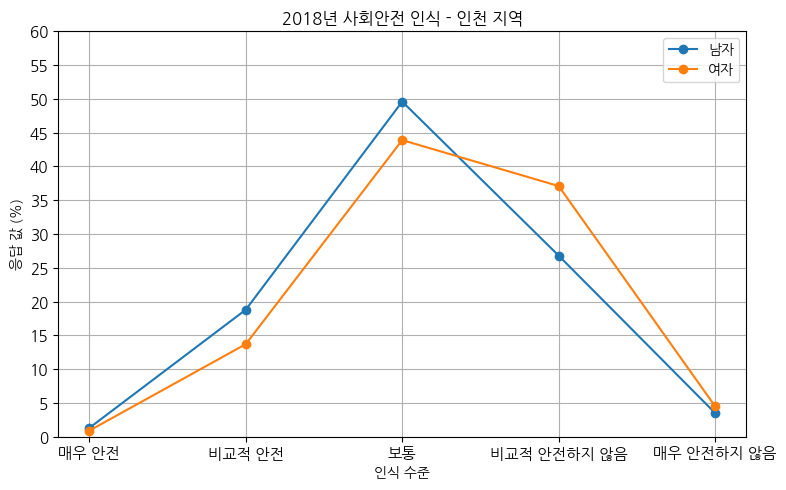

In [26]:
# 1. 한글 폰트 설정 (Colab 한글 깨짐 방지)
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 라이브러리
import pandas as pd

# 3. 데이터 불러오기
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2018.csv'
df = pd.read_csv(file_path)

# 4. '전국' 제외
df = df[df['행정구역별(1)'] != '전국']

# 5. 인식 수준 열 숫자형 변환
safety_cols = ['2018.1', '2018.2', '2018.3', '2018.4', '2018.5']
for col in safety_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. 필요한 열만 추출
df = df[['행정구역별(1)', '특성별(2)'] + safety_cols]

# 7. 인식 수준 레이블
safety_labels = ['매우 안전', '비교적 안전', '보통', '비교적 안전하지 않음', '매우 안전하지 않음']

# 8. 인천 지역 필터링
incheon_df = df[df['행정구역별(1)'] == '인천']

# 9. 남자 데이터
male_row = incheon_df[incheon_df['특성별(2)'] == '남자']
male_values = male_row[safety_cols].values.flatten().astype(float) if not male_row.empty else [None] * 5

# 10. 여자 데이터
female_row = incheon_df[incheon_df['특성별(2)'] == '여자']
female_values = female_row[safety_cols].values.flatten().astype(float) if not female_row.empty else [None] * 5

# 11. 꺾은선 그래프 (남녀 모두 표시)
plt.figure(figsize=(8, 5))
plt.plot(safety_labels, male_values, marker='o', label='남자')
plt.plot(safety_labels, female_values, marker='o', label='여자')

plt.title('2018년 사회안전 인식 - 인천 지역')
plt.xlabel('인식 수준')
plt.ylabel('응답 값 (%)')
plt.yticks(range(0, 61, 5), fontsize=11)
plt.ylim(0, 60)
plt.xticks(fontsize=11)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 사회안전에 대한 인식 비교

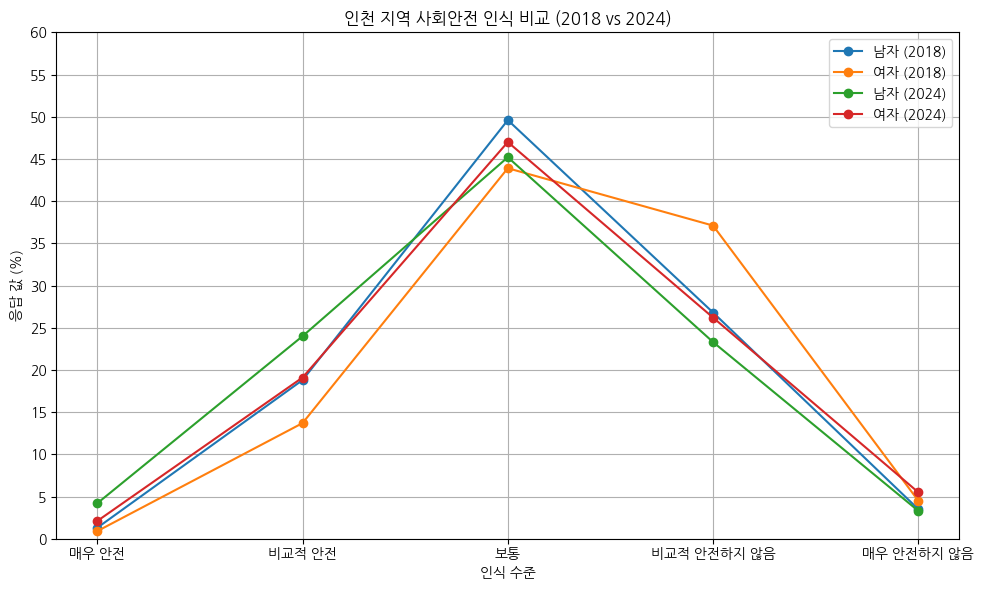

In [27]:
# 1. 한글 폰트 설정 (Colab)
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 라이브러리
import pandas as pd

# 3. 파일 경로
path_2018 = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2018.csv'
path_2024 = '/content/drive/MyDrive/1st Dataton/DatEZ/사회안전에_대한_인식_시도_2024.csv'

# 4. 데이터 불러오기
df18 = pd.read_csv(path_2018)
df24 = pd.read_csv(path_2024)

# 5. '전국' 제외
df18 = df18[df18['행정구역별(1)'] != '전국']
df24 = df24[df24['행정구역별(1)'] != '전국']

# 6. 열 이름 설정 및 숫자형 변환
cols_18 = ['2018.1', '2018.2', '2018.3', '2018.4', '2018.5']
cols_24 = ['2024.1', '2024.2', '2024.3', '2024.4', '2024.5']
for col in cols_18:
    df18[col] = pd.to_numeric(df18[col], errors='coerce')
for col in cols_24:
    df24[col] = pd.to_numeric(df24[col], errors='coerce')

# 7. 인식 수준 라벨
safety_labels = ['매우 안전', '비교적 안전', '보통', '비교적 안전하지 않음', '매우 안전하지 않음']

# 8. 인천 지역 필터링
df18_incheon = df18[df18['행정구역별(1)'] == '인천']
df24_incheon = df24[df24['행정구역별(1)'] == '인천']

# 9. 각 데이터 추출
m18 = df18_incheon[df18_incheon['특성별(2)'] == '남자'][cols_18].values.flatten().astype(float)
f18 = df18_incheon[df18_incheon['특성별(2)'] == '여자'][cols_18].values.flatten().astype(float)
m24 = df24_incheon[df24_incheon['특성별(2)'] == '남자'][cols_24].values.flatten().astype(float)
f24 = df24_incheon[df24_incheon['특성별(2)'] == '여자'][cols_24].values.flatten().astype(float)

# 10. 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(safety_labels, m18, marker='o', label='남자 (2018)')
plt.plot(safety_labels, f18, marker='o', label='여자 (2018)')
plt.plot(safety_labels, m24, marker='o', label='남자 (2024)')
plt.plot(safety_labels, f24, marker='o', label='여자 (2024)')

plt.title('인천 지역 사회안전 인식 비교 (2018 vs 2024)')
plt.xlabel('인식 수준')
plt.ylabel('응답 값 (%)')
plt.yticks(range(0, 61, 5))
plt.ylim(0, 60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 지역 안전 등급 현황

In [28]:
import pandas as pd

# 데이터 파일을 읽어서 데이터프레임으로 저장
data = pd.read_csv("/content/drive/MyDrive/1st Dataton/DatEZ/지역안전등급현황_시도_시_군_구.csv")

# 데이터프레임 출력
print(data)

     행정구역별(1)  2023 2023.1 2023.2 2023.3 2023.4 2023.5
0    행정구역별(1)  교통사고     화재     범죄   생활안전     자살    감염병
1       서울특별시     1      3      4      1      1      2
2      서울 종로구     2      5      5      5      2      2
3       서울 중구     4      5      5      5      3      2
4      서울 용산구     5      4      4      3      1      3
..        ...   ...    ...    ...    ...    ...    ...
239    경남 산청군     4      4      2      5      2      4
240    경남 함양군     5      2      3      2      3      4
241    경남 거창군     3      3      3      1      2      4
242    경남 합천군     4      4      2      4      4      5
243   제주특별자치도     2      2      5      5      3      2

[244 rows x 7 columns]


In [36]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/지역안전등급현황_시도_시_군_구.csv'

# 1. 열 이름 없이 전체 데이터 불러오기 (헤더 포함시켜서)
df = pd.read_csv(file_path, header=None, dtype=str, keep_default_na=False)

# 2. 열 이름 설정
columns = ['행정구역별(1)', '2023.1 교통사고', '2023.2 화재', '2023.3 범죄', '2023.4 생활안전', '2023.5 자살', '2023.6 감염병']
df.columns = columns

# 3. '행정구역별(1)'에서 특수 공백 제거 및 필터링
df['행정구역별(1)'] = df['행정구역별(1)'].str.replace('\xa0', '', regex=True).str.strip()

# 4. '인천' 포함 행 모두 추출
incheon_df = df[df['행정구역별(1)'].str.contains('인천', na=False)]

# 5. 저장
save_path = '/content/drive/MyDrive/1st Dataton/DatEZ/지역안전등급현황_인천.csv'
incheon_df.to_csv(save_path, index=False)

incheon_df

,행정구역별(1),2023.1 교통사고,2023.2 화재,2023.3 범죄,2023.4 생활안전,2023.5 자살,2023.6 감염병
55,인천광역시,3,2,2,4,3,4
56,인천 중구,3,1,3,5,2,3
57,인천 동구,1,2,1,3,3,3
58,인천 연수구,1,1,2,2,3,2
59,인천 남동구,3,2,2,3,4,3
60,인천 부평구,3,2,4,4,3,4
61,인천 계양구,2,2,2,2,4,3
62,인천 서구,3,2,2,4,3,3
63,인천 미추홀구,5,1,4,4,4,4
64,인천 강화군,1,4,4,4,2,3


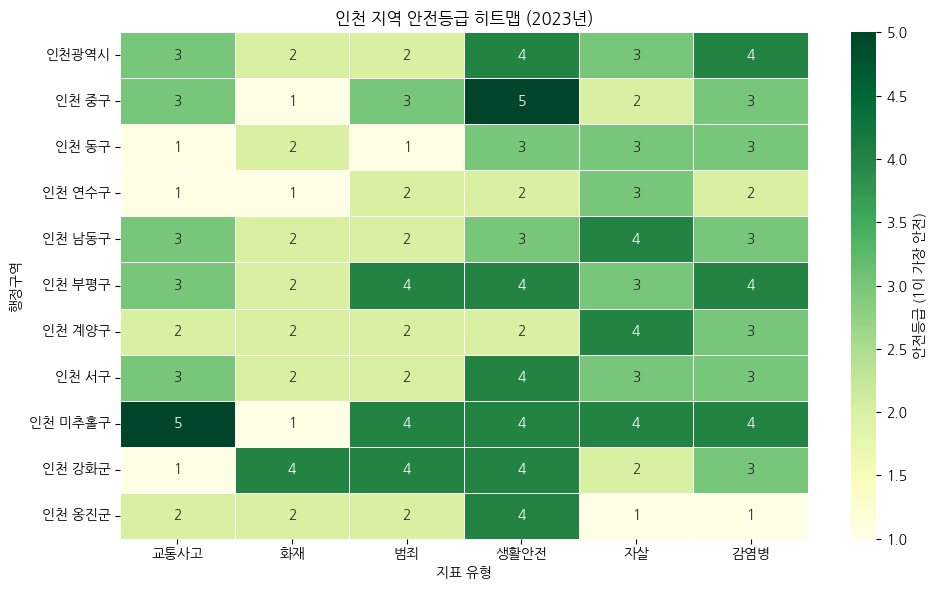

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 지표 열만 추출 (행정구역은 index로 설정)
heatmap_df = incheon_df.set_index('행정구역별(1)').copy()

# 2. 컬럼 이름이 숫자로 시작해서 보기 어려우면 정리
heatmap_df.columns = ['교통사고', '화재', '범죄', '생활안전', '자살', '감염병']

# 3. 데이터 숫자형으로 변환
heatmap_df = heatmap_df.astype(float)

# 4. 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap='YlGn', linewidths=0.5, fmt='.0f', cbar_kws={'label': '안전등급 (1이 가장 안전)'})
plt.title('인천 지역 안전등급 히트맵 (2023년)')
plt.xlabel('지표 유형')
plt.ylabel('행정구역')
plt.tight_layout()
plt.show()


# 범죄 발생 지역별

In [32]:
import pandas as pd

# 1. CSV 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_범죄 발생 지역별 통계_20231231.csv'

# 2. 인코딩 지정해서 데이터 불러오기 (cp949로 인코딩 오류 방지)
data = pd.read_csv(file_path, encoding='cp949')

# 데이터프레임 출력
print(data)

     범죄대분류        범죄중분류  서울종로구  서울중구  서울용산구  서울성동구  서울광진구  서울동대문구  서울중랑구  \
0     강력범죄         살인기수      2     0      1      1      0       2      4   
1     강력범죄        살인미수등      1     3      2      1      2       3      2   
2     강력범죄           강도      5     6      3      2      5       4      2   
3     강력범죄           강간     25    30     45     22     42      36     40   
4     강력범죄         유사강간     10     4      4      6      9       5      9   
5     강력범죄         강제추행    204   182    195     92    188     107    118   
6     강력범죄  기타 강간 강제추행등      0     0      0      0      0       1      0   
7     강력범죄           방화      4    13     16      4      5      11      4   
8     절도범죄         절도범죄   1173  1523    971    891   1619    1278   1400   
9     폭력범죄           상해    127   127    107     79    111     101    121   
10    폭력범죄           폭행    905  1001   1018    548    842     839    913   
11    폭력범죄         체포감금      6     8      7      4      4      11      5   
12    폭력범죄  

In [33]:
import pandas as pd

# 1. 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_범죄 발생 지역별 통계_20231231.csv'

# 2. 인코딩 지정해서 데이터 읽기
data = pd.read_csv(file_path, encoding='cp949')

# 3. '인천'이 포함된 열 + '범죄대분류', '범죄중분류'는 무조건 포함
required_cols = ['범죄대분류', '범죄중분류']
incheon_cols = [col for col in data.columns if '인천' in col]
final_cols = required_cols + incheon_cols

# 4. 열 추출
incheon_df = data[final_cols]

# 5. 저장
save_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_범죄_인천.csv'
incheon_df.to_csv(save_path, index=False)

incheon_df

,범죄대분류,범죄중분류,인천중구,인천동구,인천미추홀구,인천연수구,인천남동구,인천부평구,인천계양구,인천서구,인천강화군,인천옹진군
0,강력범죄,살인기수,2,0,4,2,7,1,2,4,0,0
1,강력범죄,살인미수등,0,0,3,3,6,3,1,1,2,0
2,강력범죄,강도,1,2,11,5,13,17,7,3,1,0
3,강력범죄,강간,26,1,67,33,57,66,31,44,8,3
4,강력범죄,유사강간,4,1,15,5,4,12,2,9,0,0
5,강력범죄,강제추행,56,13,172,82,167,202,80,177,13,6
6,강력범죄,기타 강간 강제추행등,2,0,0,2,4,2,1,1,0,0
7,강력범죄,방화,6,2,10,7,6,22,11,13,0,0
8,절도범죄,절도범죄,677,179,1644,1241,1402,2207,735,1297,173,25
9,폭력범죄,상해,129,27,211,154,242,270,94,202,46,17


In [34]:
import pandas as pd

# 1. 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_범죄_인천.csv'

# 2. CSV 불러오기 (utf-8-sig 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 3. 숫자형 열만 추출 후 열별 합계 계산
numeric_df = df.select_dtypes(include='number')
sum_by_column = numeric_df.sum()

# 4. Series → DataFrame 변환 (저장용)
sum_df = sum_by_column.reset_index()
sum_df.columns = ['군구', '범죄합계']

# 5. 저장 경로
save_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_범죄_인천 군구별 범죄건수.csv'

# 6. CSV로 저장
sum_df.to_csv(save_path, index=False, encoding='utf-8-sig')

sum_df

,군구,범죄합계
0,인천중구,8621
1,인천동구,1166
2,인천미추홀구,14310
3,인천연수구,9869
4,인천남동구,14814
5,인천부평구,14766
6,인천계양구,7405
7,인천서구,16833
8,인천강화군,1945
9,인천옹진군,2961


# 범죄 발생 경찰서별

In [12]:
import pandas as pd

# 1. CSV 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_전국 경찰서별 강력범죄 발생 현황.csv'

# 2. 인코딩 지정해서 데이터 불러오기 (cp949로 인코딩 오류 방지)
data = pd.read_csv(file_path, encoding='cp949')

# 데이터프레임 출력
print(data)

     발생년도       경찰서  살인  강도    절도    폭력
0    2023   서울중부경찰서   2   1   917  1032
1    2023   서울종로경찰서   5   5   607   892
2    2023  서울남대문경찰서   1   5   603   575
3    2023  서울서대문경찰서   5   0  1194  1026
4    2023   서울혜화경찰서   0   0   562   671
..    ...       ...  ..  ..   ...   ...
255  2023   경남함안경찰서   1   1   107   200
256  2023   경남의령경찰서   0   1    50    87
257  2023  제주서귀포경찰서   7   2   774  1467
258  2023   제주동부경찰서   2   8  1149  1884
259  2023   제주서부경찰서   1   6  1345  1746

[260 rows x 6 columns]


In [13]:
import pandas as pd

# 1. 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_전국 경찰서별 강력범죄 발생 현황.csv'

# 2. 인코딩 지정하여 데이터 불러오기
df = pd.read_csv(file_path, encoding='cp949')

# 3. '경찰서' 열에서 '인천' 포함된 행만 필터링
incheon_df = df[df['경찰서'].astype(str).str.contains('인천', na=False)]

# 4. 결과 저장
save_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_강력범죄_인천경찰서.csv'
incheon_df.to_csv(save_path, index=False)

incheon_df

,발생년도,경찰서,살인,강도,절도,폭력
57,2023,인천중부경찰서,1,3,874,1351
58,2023,인천미추홀경찰서,7,11,1653,2298
59,2023,인천남동경찰서,8,13,894,1377
60,2023,인천부평경찰서,1,14,1089,1291
61,2023,인천서부경찰서,5,3,1298,2718
62,2023,인천계양경찰서,3,7,737,1293
63,2023,인천강화경찰서,2,1,170,337
64,2023,인천연수경찰서,5,5,1235,1440
65,2023,인천삼산경찰서,3,3,1110,1567
66,2023,인천논현경찰서,4,0,507,831


# CCTV와 범죄 발생 상관관계

In [66]:
import pandas as pd

# 1. 파일 경로
file_path = '/content/drive/MyDrive/1st Dataton/DatEZ/CCTV_output.csv'

# 2. 파일 읽기 (인코딩은 utf-8-sig 또는 cp949 시도)
df = pd.read_csv(file_path, encoding='cp949')

# 3. '카메라대수' 열을 숫자로 변환
df['카메라대수'] = pd.to_numeric(df['카메라대수'], errors='coerce')

# 4. 군구별로 카메라대수 합산
grouped = df.groupby('군구')['카메라대수'].sum().reset_index()

# 5. 결과 확인
print(grouped)

# 6. 결과 저장
save_path = '/content/drive/MyDrive/1st Dataton/DatEZ/인천 군구별 CCTV 수.csv'
grouped.to_csv(save_path, index=False, encoding='utf-8-sig')

     군구  카메라대수
0   강화군   1677
1   계양구   2031
2   남동구   2395
3    동구    854
4  미추홀구   2449
5   부평구   2150
6    서구   1399
7   연수구    471
8   옹진군    230
9    중구   1097



✅ 피어슨 상관계수: 0.554
✅ p-value: 0.0966 (p < 0.05이면 통계적으로 유의함)

✅ 회귀식: 범죄합계 = 4.07 × 카메라대수 + 3267.47
✅ 결정계수 (R²): 0.307 (1에 가까울수록 설명력 높음)


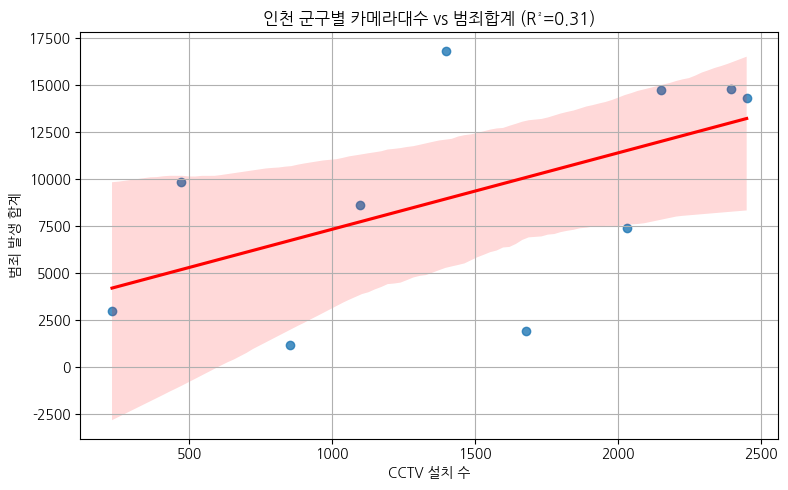


✅ 회귀계수(기울기): 4.07
✅ 절편(intercept): 3267.47
✅ 회귀식: 범죄합계 = 4.07 × CCTV 수 + 3267.47
✅ 결정계수 (R²): 0.307


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. 파일 경로
crime_path = '/content/drive/MyDrive/1st Dataton/DatEZ/경찰청_범죄_인천 군구별 범죄건수.csv'
cctv_path = '/content/drive/MyDrive/1st Dataton/DatEZ/인천 군구별 CCTV 수.csv'

# 2. 파일 불러오기
crime_df = pd.read_csv(crime_path, encoding='utf-8-sig')
cctv_df = pd.read_csv(cctv_path, encoding='utf-8-sig')

# 3. '군구' 정제 ('인천' 제거 및 공백 제거)
crime_df['군구'] = crime_df['군구'].str.replace('인천', '', regex=False).str.strip()
cctv_df['군구'] = cctv_df['군구'].str.strip()

# 4. 숫자형 변환
crime_df['범죄합계'] = pd.to_numeric(crime_df['범죄합계'], errors='coerce')
cctv_df['카메라대수'] = pd.to_numeric(cctv_df['카메라대수'], errors='coerce')

# 5. 병합
merged = pd.merge(crime_df, cctv_df, on='군구')

# 6. 결측치 제거
merged = merged.dropna(subset=['카메라대수', '범죄합계'])

# 7. 분석 가능 여부 확인
if len(merged) < 2:
    print(" 병합된 데이터가 2개 미만입니다. 분석 불가능.")
else:
    # 8. 상관계수
    corr, p_value = pearsonr(merged['카메라대수'], merged['범죄합계'])
    print(f"\n✅ 피어슨 상관계수: {corr:.3f}")
    print(f"✅ p-value: {p_value:.4f} (p < 0.05이면 통계적으로 유의함)")

    # 9. 회귀분석
    X = merged[['카메라대수']].values  # 2D array
    y = merged['범죄합계'].values   # 1D array

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)

    print(f"\n✅ 회귀식: 범죄합계 = {slope:.2f} × 카메라대수 + {intercept:.2f}")
    print(f"✅ 결정계수 (R²): {r_squared:.3f} (1에 가까울수록 설명력 높음)")

    # 10. 시각화
    plt.figure(figsize=(8, 5))
    sns.regplot(x='카메라대수', y='범죄합계', data=merged, line_kws={'color': 'red'})
    plt.title(f'인천 군구별 카메라대수 vs 범죄합계 (R²={r_squared:.2f})')
    plt.xlabel('CCTV 설치 수')
    plt.ylabel('범죄 발생 합계')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 회귀 분석 모델 훈련
model = LinearRegression()
model.fit(X, y)

# 회귀 계수와 절편
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

# ✅ 결과 출력
print(f"\n✅ 회귀계수(기울기): {slope:.2f}")
print(f"✅ 절편(intercept): {intercept:.2f}")
print(f"✅ 회귀식: 범죄합계 = {slope:.2f} × CCTV 수 + {intercept:.2f}")
print(f"✅ 결정계수 (R²): {r_squared:.3f}")


In [84]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()

filename = list(uploaded.keys())[0]

try:
    df = pd.read_csv('인천 군구별 CCTV, 범죄수, 인구수.csv', encoding='cp949')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: File '인천 군구별 CCTV, 범죄수, 인구수.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Saving 인천 군구별 CCTV, 범죄수, 인구수.csv to 인천 군구별 CCTV, 범죄수, 인구수.csv


,Unnamed: 0,범죄수,CCTV수,인구수,범죄율,cctv율,Unnamed: 6,Unnamed: 7
0,중구,1783,663,79520,224.220322,83.375252,NaN,NaN
1,동구,452,332,28091,160.905628,118.187320,NaN,NaN
2,미추홀구,4227,2449,196607,214.997431,124.563215,NaN,NaN
3,연수구,2816,471,159905,176.104562,29.454989,NaN,NaN
4,남동구,3876,1189,224268,172.828937,53.016926,NaN,NaN


(10, 8)


Correlation between crime rate and CCTV rate: -0.19727357412224508


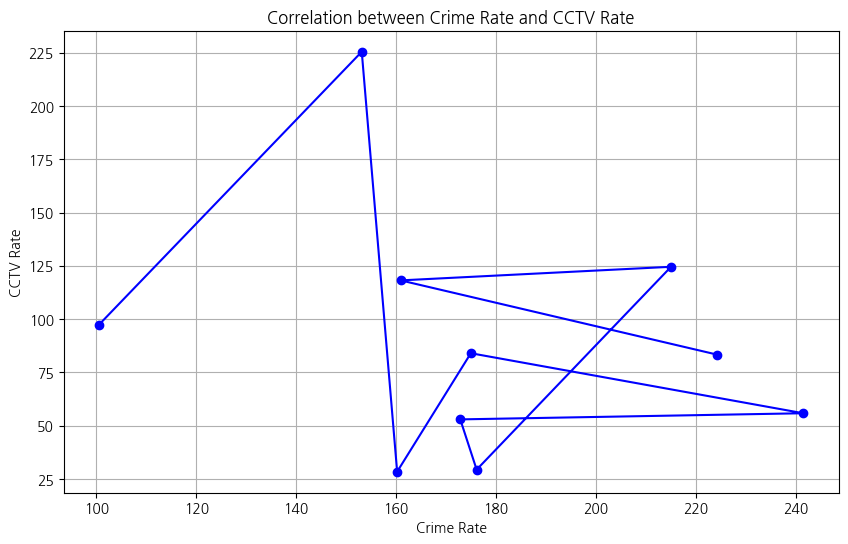

In [85]:
import matplotlib.pyplot as plt

# Calculate the correlation between crime rate and CCTV rate
correlation = df['범죄율'].corr(df['cctv율'])
print(f"Correlation between crime rate and CCTV rate: {correlation}")

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['범죄율'], df['cctv율'], marker='o', linestyle='-', color='b')
plt.title('Correlation between Crime Rate and CCTV Rate')
plt.xlabel('Crime Rate')
plt.ylabel('CCTV Rate')
plt.grid(True)
plt.show()

Correlation between crime rate and CCTV rate: -0.19727357412224508


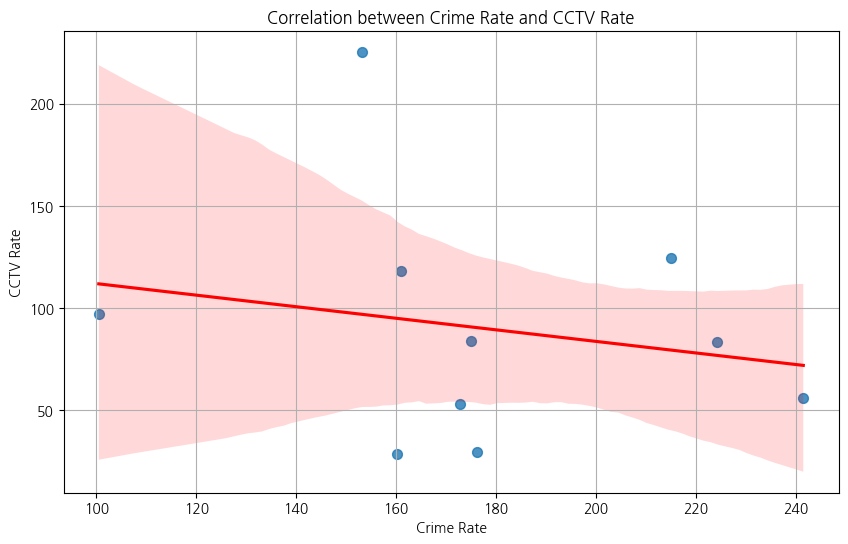

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between crime rate and CCTV rate
correlation = df['범죄율'].corr(df['cctv율'])
print(f"Correlation between crime rate and CCTV rate: {correlation}")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='범죄율', y='cctv율', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Crime Rate and CCTV Rate')
plt.xlabel('Crime Rate')
plt.ylabel('CCTV Rate')
plt.grid(True)
plt.show()

In [87]:
import pandas as pd

# '인천 군구별 CCTV, 범죄수, 인구수.csv' 파일을 불러옵니다.
df = pd.read_csv('인천 군구별 CCTV, 범죄수, 인구수.csv', encoding='cp949')

# 범죄율과 CCTV율 간의 상관 계수를 계산합니다.
correlation = df['범죄율'].corr(df['cctv율'])

# 상관 계수를 기반으로 상관관계 여부를 판단합니다.
if correlation > 0.7:
    result = "범죄율과 CCTV율 간에는 강한 양의 상관관계가 있습니다."
elif correlation < -0.7:
    result = "범죄율과 CCTV율 간에는 강한 음의 상관관계가 있습니다."
elif 0.3 < correlation < 0.7:
    result = "범죄율과 CCTV율 간에는 약한 양의 상관관계가 있습니다."
elif -0.3 < correlation < -0.7:
    result = "범죄율과 CCTV율 간에는 약한 음의 상관관계가 있습니다."
else:
    result = "범죄율과 CCTV율 간에는 상관관계가 거의 없습니다."

# 결과를 출력합니다.
print(result)

범죄율과 CCTV율 간에는 상관관계가 거의 없습니다.
